## Data Analysis Project Using Python

## ZOMATO

    Zomato has an average of 17.5 million monthly transacting customers for its food delivery business.e average monthly active food delivery restaurant partners on Zomato's platform have also increased by 8.7% year-on-year, from 208,000 to 226,000.You are working in a data-driven role at Zomato. You have a dataset of customers. As a data professional, you need to analyze the data, perform EDA (Exploratory Data Analysis) and visualization, and answer the following questions:    

1) What type of restaurant do the majority of customers order from?

2) How many votes has each type of restaurant received from customers?

3) What are the ratings that the majority of restaurants have received?

4) Zomato has observed that most couples order most of their food online. What is their average spending on each order?

5) Which mode (online or offline) has received the maximum rating?

6) Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

## Step 1: Import necessary Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Step 2- Create the data frame

In [2]:
dataframe = pd.read_csv("Zomato data .csv")

In [4]:
print(dataframe)


                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [5]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


## let's convert the data type of the "rate" column to float and remove the denominator

In [6]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [7]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


## summary of the data frame

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Conclusion - There is no null value in dataframe.

## Type of Resturant

In [9]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of resturant')

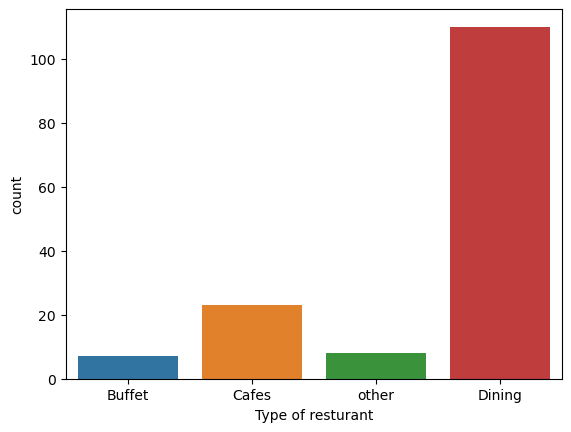

In [11]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of resturant")

## conclusion - majority of the resturants fall into the dining category

## Dining restaurants are preferred by a larger number of individuals.

In [12]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Votes')

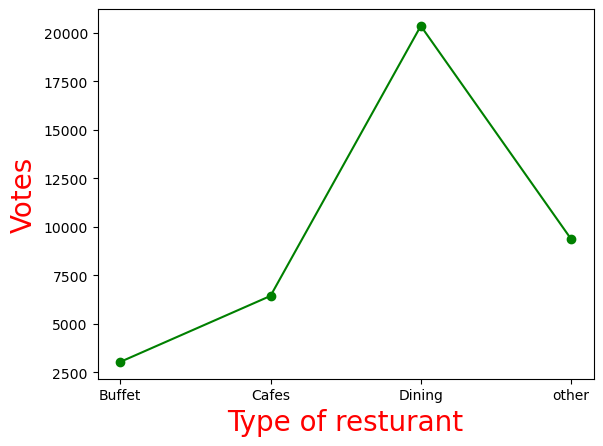

In [16]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'vote': grouped_data})
plt.plot(result, c="green" , marker ="o")
plt.xlabel("Type of resturant" , c="red" , size=20)
plt.ylabel("Votes",c="red",size=20)

## The majority of resturants received rating

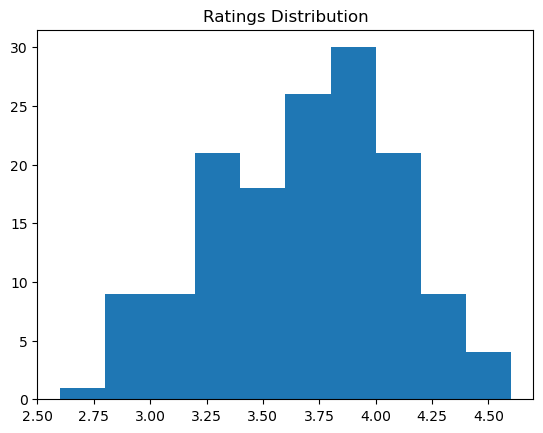

In [19]:
plt.hist(dataframe['rate'],bins=10)
plt.title("Ratings Distribution")
plt.show()

## Conclusion : The majortity of resturants received rating ranging from 3.5 to 4 

## The Majority of couples prefer resturants with an approximate cost of 300 rupees.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

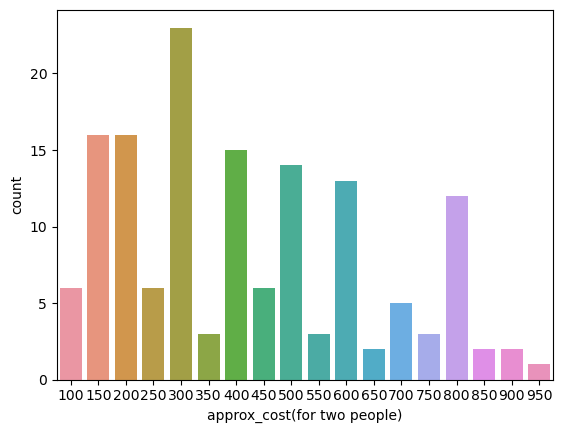

In [18]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

## Whether online orders receive higher ratings than offline orders.

<Axes: xlabel='online_order', ylabel='rate'>

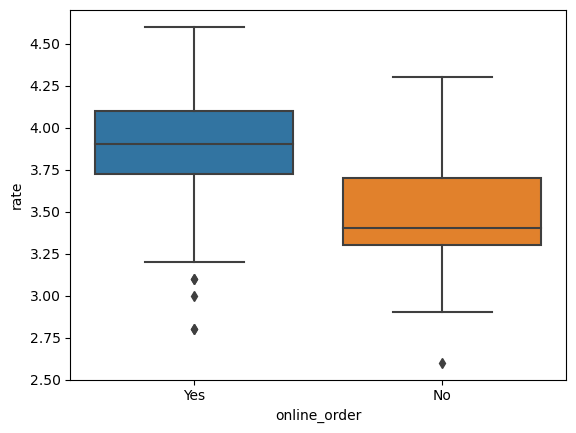

In [20]:
plt.Figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate',data=dataframe)

## Conclusion : offline orders received lower ratings in comparision to online orders,which obtained excellent ratings.

In [28]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


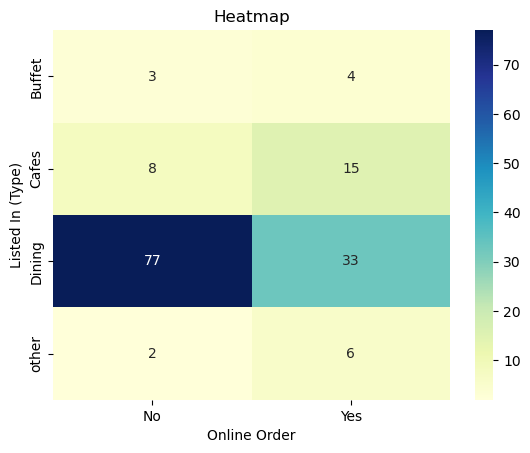

In [27]:
pivote_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc="size",fill_value=0)
sns.heatmap(pivote_table,annot=True,cmap="YlGnBu",fmt="d")
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

## Conclusion : Dining resturants primarily accept offline orders,whereas cafes primarily recevie online orders.This suggests that clients prefer to place orders in person at resturants , but prefer online ordering at cafes. 